In [0]:
# !pip install qiskit

# Visualizing a Quantum Data and Entangled States of two qubits 


Saranraj Nambusubramaniyan

In [0]:
# Circuit design functions
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import matplotlib_circuit_drawer as drawer, qx_color_scheme
from qiskit import IBMQ 


# import state tomography functions
from qiskit.tools.visualization import plot_histogram, plot_state

# Aer, Qiskit element that really speed up development of quantum computers we need better simulators, emulators and debuggers.
from qiskit import Aer
from qiskit import execute

In [0]:
# Import libraries

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pprint import pprint
from scipy import linalg as la

### API and backend access 

In [144]:
IBMQ.save_account('d9eb68796efbdcfc8454042c342fddbaaa8ecadb1728917d50b2c5765abff0f797a2eb9d82416f44df3c545df8178fd16ba14cb9cf6a677ae1b6235766d31d71')
IBMQ.save_account('d9eb68796efbdcfc8454042c342fddbaaa8ecadb1728917d50b2c5765abff0f797a2eb9d82416f44df3c545df8178fd16ba14cb9cf6a677ae1b6235766d31d71', 'URL')

IBMQ.load_accounts()
print("Available backends:")
IBMQ.backends()

/usr/local/lib/python3.6/dist-packages/qiskit/backends/ibmq/ibmqprovider.py:141: UserWarning: Credentials are already stored.
  warnings.warn('Credentials are already stored.')
/usr/local/lib/python3.6/dist-packages/qiskit/backends/ibmq/ibmqprovider.py:258: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [145]:
from qiskit.backends.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] > 3 and
                                                       not x.configuration()['simulator'])
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


### Least busy backends prevents access timeout error. Therefore we use ibmq_16_melbourne

In [0]:
backend = 'ibmq_16_melbourne'

### Create the quantum circuit

In [0]:
# Create a Quantum Register called "q" with 2 qubits
qr = QuantumRegister(2, 'q')

# Create a Classical Register called "c" with 2 bits
cr = ClassicalRegister(2, 'c')

In [156]:
# Create a Quantum Circuit called involving "qr" and "cr"

circuit = QuantumCircuit(qr, cr)  # Initialize instance of QuantumCircuit

circuit.h(qr[0])  # Apply Hadamard transform
circuit.cx(qr[0],qr[1])  # Apply CNOT Gate; 0 - Control bit ; 1 - Target bit



### Visualize the circuit

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



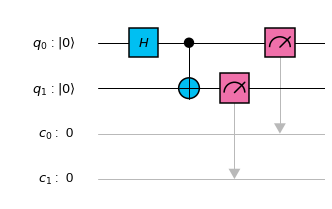

In [157]:
circuit.measure(qr,cr)

drawer(circuit,style=qx_color_scheme())
print(circuit.qasm())

### Execute  the quantum circuit

In [176]:
job = execute(circuit, backend= backend)
state_entanglement = job.result().results()

/usr/local/lib/python3.6/dist-packages/qiskit/wrapper/_wrapper.py:312: DeprecationWarning: execute() no longer takes backend string names. Please pass backend objects, obtained viaIBMQ.get_backend() or Aer.get_backend().
  'IBMQ.get_backend() or Aer.get_backend().', DeprecationWarning)


TypeError: ignored

In [175]:
# backend = Aer.get_backend(backend)

#plot_state(state_entanglement,'bloch')
print('state_entanglement = ', state_entanglement.get_data(circuit))


state_entanglement =  {'time': 19.28739285469055, 'counts': {'00': 528, '01': 45, '10': 36, '11': 415}, 'date': '2018-10-17T22:03:50.657Z'}


In [0]:

# execute the quantum circuit 
backend = Aer.get_backend('ibmqx_qasm_simulator')
job = execute(qc1, backend)
state_entanglement = job.result().get_stateve
# rho_entanglement=state_2_rho(state_entanglement)
plot_state(state_entanglement, 'bloch')
# print('rho_entanglement = ', rho_entanglement)
print('state_entanglement = ', state_entanglement)